## **Structuring code with classes**
#### _part I: Implementing machine learning algorithms in Python with an Object Oriented lens_

<p style='text-align: right'> v0.7 <a href="v0.1 hdaniel@ualg.pt">hdaniel@ualg.pt </p>
<p style='text-align: right'> 20 0ct 2024</a> </p>


---
### 1. Introduction
The Python programming language has been extensively used in the Machine Learning (ML) field. Though it is a slow interpreted language, not quite suited for heavy computation algorithms, fast optimized ML frameworks, developed with other languages, were made available to Python.
Frameworks, such as: Scikit-learn, Numpy, Keras, TensorFlow, PyTorch, were developed to run efficiently on multicore CPUs, GPUs, and Tensor cores.

While those frameworks overcome Python's slowness issue, at least when implementing ML algorithms, Python still does not enforce clear and safe coding. 
However, with some care, and following some Object Oriented (OO) design principles, we can develop clear, efficient, and safe code that will spare us from unnecessary refactoring later as the project grows.

This tutorial shows how to implement ML algorithms in Python using classes and inheritance to promote code reuse and avoid code redundancy, while maintaining a good performance. Inheritance levels are kept to a necessary minimum to avoid degrading performance.

Keep in mind that this tutorial is focused on implementing simple Machine Learning clasifiers, thus showing only a small set of the Object Oriented toolbox.


---
### 2. Definition of the problem

Having a dataset with data points and their targets we want to train a model to predict the target for data points not included in the training dataset.

A dataset have $m$ data points, each with a set of $n$ features and a target or label $y$. The 
features are stored in matrix $\mathbf X$ and the labels in vector $\mathbf y$. \
$\mathbf{X}$ matrix has 1s in the leftmost column, for the $bias$:\
\
$
\quad 
\begin{split}
\mathbf{X}_{m\times (1+n)} &=
\begin{bmatrix}
    1 & x_1^{(1)}   & x_2^{(1)} & \dots & x_n^{(1)}\\
    1 & x_1^{(2)}   & x_2^{(2)} & \dots & x_n^{(2)}\\
    & & \vdots & &\\
    1 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}\\
\end{bmatrix}
\quad\quad
\mathbf{y} &=
\begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots \\
    y^{(m)}\\
\end{bmatrix}
\end{split} 
$ \
\
$
\begin{split}
m       &= \text {the number of training examples (points)} \\
n       &= \text {the number of features} \\
x^{(i)} &= \text {the input (features) of the $i^{th}$ training example} \\
x_j^{(i)} &= \text {the value of feature $j$ in the $i^{th}$ training example} \\
y^{(i)} &= \text {the target of the $i^{th}$ training example} \\
\end{split}
$ \
\
Different algorithms implement different mathematical models. Depending on the dataset a specific algorithm, or model, may be more suitable than others.

However, the fundamental principle is the same for all models. The model must be trained with the dataset before being able to generate useful predictions. This training step is also known as **fitting** the model to the dataset. 

---
### 3. Machine learning frameworks

Machine learning frameworks implement algorithms with classes that provide 2 main methods:

- fit()
- predict()

Scikit-learn framework: https://scikit-learn.org/

follows this structure for all the implemented algorithms:

- Linear regression
- Gradient boosting
- random forests
- nearest neighbours
  $\dots$


To use the Scikit-learn linear regression model implementation, we need to create an instance of the class `LinearRegression`:

```
clf = LinearRegression()
```

If later, instead of using Linear Regression, we want to try a Random Forest classifier, we just need to create an instance of that classifier instead:

```
clf = RandomForestClassifier()
```

All the code below works with both algorithms.

Having chosen an algorithm, now it is needed to fit the model to the dataset using the `fit()` method:

```
clf.fit(X, y)
```

then, we can use the trained model to predict the target y for some data point:

```
yi = clf.predict(xi)
```

or a set of data points in a column vector (note that Numpy requires a 2D vector, hence the double square brackets [[2,3,4]]):

```
xp = np.array([[2,3,4]]).T
yp = clf.predict(xp)
```

Let's see an example:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression as LinearRegressionSKL
import matplotlib.pyplot as plt

In [33]:
#An helper function to generate a random problem
from sklearn.datasets import make_regression

#Generate data
def generateData(nFeat=1, nSamples=100, ninf=2, noise=10, seed=25):
    return make_regression(
        n_samples=nSamples,
        n_features=nFeat,
        n_informative=ninf,
        noise = noise,
        random_state=seed    # random seed
    )

In [34]:
#An helper function to plot the single regression data
def plotSingleRegression(x, y, xp, yp):
    plt.plot(x, y, "+", color = "blue")
    plt.plot(xp, yp, "--", color = 'green')
    plt.scatter(xp, yp, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')

In [4]:
#An helper function to plot single variable regression data, for a dataset split in a training and test set,
#for multiple solutions, where yp parameter must be a list
#
def plotSingleRegressionV(xf, yf, xt, yt, yp):
    plt.scatter(xf, yf, color = "blue")
    plt.scatter(xt, yt, color = 'red')
    for ypi in yp:
        plt.plot(xt, ypi, '--', color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')

In [5]:
# Generate single variable problem
X, y = generateData(1, 100)

#print(np.column_stack((X, y)))
print("       X           y")
print(np.column_stack((X, y))[0:4,:])
print('            ...')
print(np.column_stack((X, y))[-2:,:])

       X           y
[[ -0.51351967  -5.47337251]
 [  0.68088892  19.92698517]
 [ -0.645784   -12.18523933]
 [  0.22600105  -4.69401119]]
            ...
[[ 0.10339501 -4.23206557]
 [ 1.05661011 20.41964075]]


-1.4885255202739376 [18.77358646]


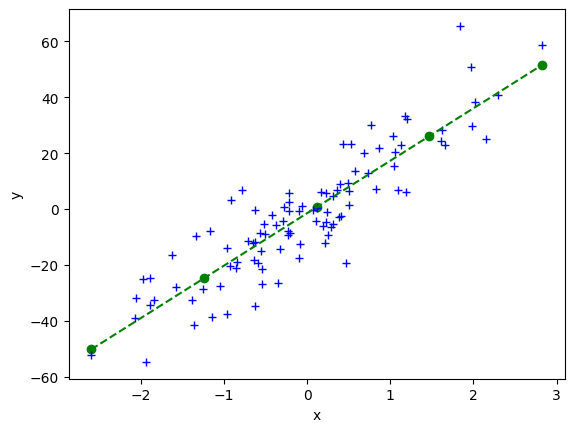

In [6]:
#let sklearn compute regression
lrk = LinearRegressionSKL()
lrk.fit(X, y)
print(lrk.intercept_, lrk.coef_)

#predict
xp0 = np.linspace(min(X),max(X),5)
yp0 = lrk.predict(xp0)

#plot
plotSingleRegression(X, y, xp0, yp0)

---
### 4. Implementing ML models in Python, an OO approach

When implementing our own models and algorithms we can set all classes to have the same fundamental methods. In software engineering terms it means that our classes must implement the same interface.
For this, we will define the following interface:

```
interface IModel
    fit(X,y)                 # train the model with dataset (X,y)
    predict(xp)              # predict y for all data points in xp vector
    theta()                  # return the coefficients
```

Note that `predict(xp)` and `theta()`return only meaningful data after training the model with `fit(X,y)`.

If all our classes implement this interface, client software can be assured that there is a standard way of using our machine learning algorithms.
This also makes it very easy to replace one class that implements some Machine Learning model with another class that implements another model.

---
### 5. Definition of the `IModel` interface in Python:

In Python an interface is defined using an Abstract Class with several abstract methods. This methods raise an **Exception**. Every class that implements the interface must implement those methods or this Exception will be raised:

In [7]:
from abc import ABC, abstractmethod
from typing import *
from numpy.typing import NDArray

class IModel(ABC):

    @abstractmethod
    def fit(X : NDArray, y : NDArray) -> None:
        '''
        X is a 2D array with n features accross columns and m data points across rows.
        y is a column vector with m labels, one for each data point in X.
        '''
        pass
    
    @abstractmethod
    def predict(xp : NDArray) -> NDArray:
        '''
        xp is a column vector with k data points, each with n features.
        returns a vector with k predicted labels, one for each data point in vector xp.
        '''
        pass

    
    @abstractmethod
    def theta() -> Union[None | NDArray]:
        '''
        returns the vector theta with k coefficients after model trained.
        before training returns None
        '''
        pass


---
### 6. Implementation of the Normal Equation model, first version

To show our OO approach, we will define a subclass of `IModel` that implements the Normal equation. 

The normal equation is an analytical method to find the values of the θ coefficients that minimizes the loss function, while gradient descent is an iterative method:

$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{⁻1}\mathbf{X}^T\mathbf{y}  \tag 1$$

Computing the normal equation does not require any iteration, which means that a learning rate is not needed, thus having one less hyperparameter to tune.

However, computing the normal equation becomes computationally heavy when there are many features, due to the inversion of the matrix. 
It is more robust to use QR decomposition to find the coefficients of an ordinary least squares linear regression because QR decomposition is numerically more stable and more efficient than the normal equation.

https://www.datacamp.com/tutorial/qr-decomposition

Note that the normal equation cannot be used for logistic regression, as it would take too much time. \
Instead, an iterative optimizer such as gradient descent can be utilized."

\
Each new class that implements a different model, will be a subclass of `IModel` interface (abstract class).

Thus, our Normal Equation implementation is a subclass of `IModel` named `NormalEqv1`, which means that it must implement `fit(X,y)`, `predict(v)` and `theta()` methods.

It also implements the `__init__()` method, which is the class constructor method, executed when a new object of this class is instantiated.
This method just initiatializes to `None`the instance variable `self._theta`. This variable will store the coefficients vector $\boldsymbol \theta$ after training.

Training is performed by `fit(X,y)` following the normal equation. At the end of training `self._theta` is filled. \
$\boldsymbol \theta$ coeficients can be obtained calling `theta()` method, after training. When this method is called before training `Ǹone` is returned. \
After training, predictions can be obtained calling `predict(xp)` method. When this method is called before training an Exception is raised. 

Note that the parameters of all methods have their types defined. This is not mandatory with Python, but it is advisable.

In [8]:
class NormalEQv1 (IModel):
    '''
    Implements the Normal equation model without regularization
    '''

    #Constructor
    def __init__(self) -> None:
        self._theta = None

    #        T      -1    T
    # Θ = ( X . X  )   . X  y
    
    #Fit with normal equation best theta
    def fit(self, X : NDArray, y : NDArray) -> None:
        # add a column of 1s for bias
        X = np.column_stack((np.ones_like(X[:,0]), X))
        
        # compute normal equation
        #pinv calculates pseudo inverse
        #useful if there is linear dependent columns
        #eg. one feature is the price in Euros and another feature is the price in Pounds
        self._theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    
    #predict after training
    def predict(self, xp : NDArray) -> NDArray:
        if self._theta is None:
            raise Exception('It is needed to fit model first')
        else:    
            # add a column of 1s for bias
            xp = np.column_stack((np.ones_like(xp[:,0]), xp))
            # predicting 
            return xp.dot(self._theta)

    
    # return values for theta found after training or None
    def theta(self) -> [None | NDArray]:
        return self._theta


\
Using this hierarchy, any subclass of `IModel` must implement the 3 methods defined in this interface. \
We can express this with an UML class diagram:

![v1](imodel-v1.png "imodel v1")

### 7. Defining a more efficient class hierarchy
\
We know that `predict(xp)` method computes the predicton vector $\mathbf y_p$, with the dot product of:
\
\
$\quad\quad \mathbf y_p = \space \mathbf {x_p}^T \space . \space \boldsymbol \theta$
\
\
**Other algorithms also use the same prediction method**. 

As far as our class hierarchy goes, each subclass of `IModel` needs a `predict(xp)` method, with the same code.
This is redundant, it is way better to rethink our class hierarchy in a way that only one implementation of `predict(xp)` method is needed.

Since every subclass inherits all the methods defined in the super classes, we can create a class named `Predictor` between the `IModel` and the current subclasses, where `predict(xp)` method is implemented, just once.

Additionally `theta()` method can also be defined in `Predictor` class, if we define the constructor `__init__()` also there. \
\
We can see that new this hierarchy does not have redundant predict(xp) and theta() methods:

![v2](imodel-v2.png "imodel v2")

## (quasi) Private methods
From the definition of the problem in 2., we know that in order to consider bias, if the features matrix $\mathbf X$ does not have it already, `Predictor` sub classes like `NormalEQ`, need to add a column of 1s as the leftmost column of $\mathbf X$. \
This is done in the `fit(X,y)` method. Additionaly this must be done also to **xp** vector the `predict(xp)` method of `Predictor`.  \
To avoid duplicating code for every sub class that needs it, we can add an extra method to the super class `Predictor` to accomplish this: 

```
class Predictor(IModel):

    # ...

    def _addBias(self, X:NDArray) -> NDArray:
        # add a column of 1s at the left
        return np.column_stack((np.ones_like(X[:,0]), X))

    # ...         
```

This method will only be used for subclasses. However Python does not enforce method visibility, thus we can not declare the method as **private**.
A Python convention suggests that methods or variables which should be used only inside the class or subclasses should have its identifier started with an underscore. This does not however hides the method.

Now, for every subclass of `Predictor` can just call the method of the super class, if and when needed it:

```
X = super()._addBias(X)
```
    
instead of executing:

```
np.column_stack((np.ones_like(X[:,0]), X)) 
```


![v3](imodel-v3.png "imodel v3")

\
Implementing in Python:

In [9]:
class Predictor (IModel):
    '''
    Implements the Normal equation model without regularization
    '''

    #Constructor
    def __init__(self) -> None:
        self._theta = None


    #predict after training
    def predict(self, xp : NDArray) -> NDArray:
        if self._theta is None:
            raise Exception('It is needed to fit model first')
        else:    
            # add a column of 1s at the left for bias
            xp = self._addBias(xp)

            # prediction
            return xp.dot(self._theta)

    
    # return values for theta found after training or None
    def theta(self) -> [None | NDArray]:
        return self._theta

    
    # add a column of 1s at the left for bias
    def _addBias(self, X:NDArray) -> NDArray:
        return np.column_stack((np.ones_like(X[:,0]), X))

\
Now, class `NormalEq`, is a subclass of the `Predictor` abstract class. All sub classes have to implement only the `fit(X,y)` method.

In [10]:
class NormalEQ (Predictor):
    '''
    Predictor base class
    '''

    #         T     -1    T
    # Θ = ( X . X  )   . X  y
    
    #Fit with normal equation best theta
    def fit(self, X : NDArray, y : NDArray) -> None:
        # add a column of 1s at the left for bias
        X = super()._addBias(X)
        
        # compute normal equation
        #pinv calculates pseudo inverse
        #useful if there is linear dependent columns
        #eg. one feature is the price in Euros and another feature is the price in Pounds
        self._theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)


In [11]:
class LinearRegression (NormalEQ):
    '''
    Implements multivariate linear regression without regularization, based on the Normal equation model

    just an alias for class NormalEQ
    '''
    pass

\
Now, we can use this last version of `NormalEQ` class to train and predict the $\mathbf y_p$ values for $\mathbf x_p$ data points. \
Note that the client code below is the same used with `ǸormalEqv1` class version.\
The only difference is the creation of an instance of `ǸormalEq` instead of `ǸormalEqv1`, at the first code lime:

---
### 8. Defining a new ML algorithm class

To define another ML algorithm, let's say single variable linear regression `LinearRegressionSingle` we need to create a new subclass of `Predictor` and implement just the `Fit(X,y)` method.


[-1.48852552 18.77358646]


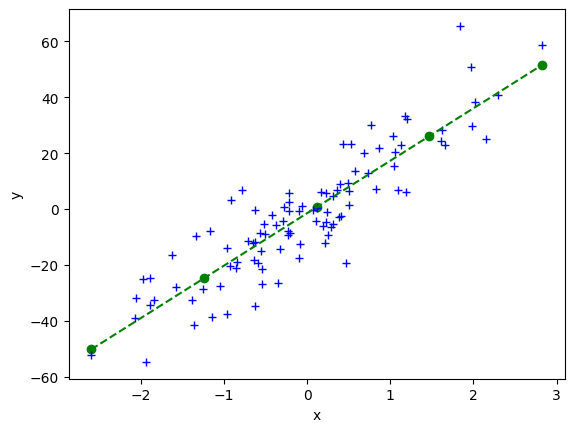

In [12]:
#Solve
neq = NormalEQ()    # Choose the algorithm to use
neq.fit(X, y)
print(neq.theta())

xp1 = np.linspace(min(X),max(X),5)
yp1 = neq.predict(xp1)

plotSingleRegression(X, y, xp1, yp1)

In [13]:
class LinearRegressionSingle (Predictor):
    
    # Returns theta0 and theta1 linear regression parameters
    #
    # h0(x) = Θ0 + Θ1*x
    #
    # PRE x.shape == y.shape
    #
    def fit(self, x : NDArray, y : NDArray) -> None:
        if x.shape[1] > 1:
            raise Exception('Can only be used for single variable linear regression')
        
        meanX = np.mean(x)
        meanY = np.mean(y)
    
        #         m                                        T        
        #        ∑  (x(i) - x̄) * (y(i) - ȳ)     ( x - x̄ ) . ( y - ȳ )
        # Θ1 =  ----------------------------- = -------------------------
        #            m                                     T
        #           ∑  (x(i) - x̄) ** 2          ( x - x̄ ) . ( x - x̄ )
        
        m = len(x)   
        xs = np.subtract(x, meanX).flatten()
        ys = np.subtract(y, meanY)
        num = np.dot(xs, ys)
        den = np.dot(xs, xs)
            
        theta1 = num / den      
    
        # Linear regression 1 independent variable:
        #        y = Θ0 + Θ1*x
        #
        # hypotesis:
        #    h0(x) = Θ0 + Θ1*x
        #
        #       Θ0 = ȳ - Θ1 * x̄
        theta0 = meanY - theta1 * meanX
        
        self._theta = np.array((theta0, theta1))
        pass

\
Both `Predictor` sub classes give the same solution for single independent variable linear regression:


[-1.48852552 18.77358646]


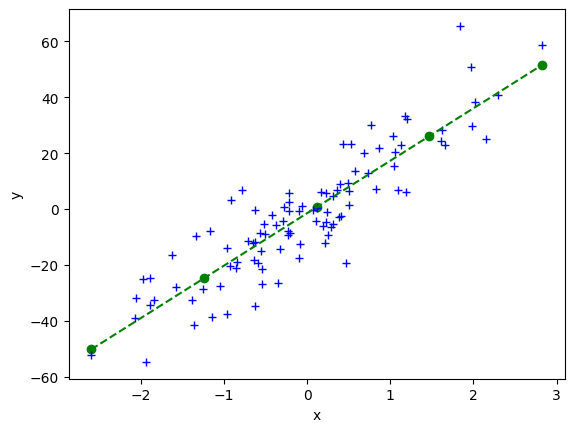

In [14]:
#Solve
lrs = LinearRegressionSingle()    # Choose the algorithm to use
lrs.fit(X, y)
print(lrs.theta())

xp2 = np.linspace(min(X),max(X),5)
yp2 = lrs.predict(xp1)

plotSingleRegression(X, y, xp1, yp2)

---
### 9. Normal equation with regularization

Model overfitting is a major concern with machine learning models. When a model overfits it is learning the training dataset too hard, including noise. Noise is the data points that do not represent the true features in the dataset, like outliers.
When the model overfits it has a low accuracy with the test or validation dataset.

Regularization reduces the risk of the model overfitting to noise, reducing the $\theta$ coefficients towards zero.

The equation below defines the Normal equation with Regularization:

$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X}+\lambda \mathbf{R})^{⁻1}\mathbf{X}^T\mathbf{y}  \tag 2$$

The $\lambda$ parameter is the amount of regularization to apply. 

Note that regularization is not applied to $\theta_0$ or $bias$. The $\theta_0$ coefficient also know as $intercept$, gives the interception with the $y$ axis (for a 1 variable regression model), which is the offset of the curve from $x$ axis. It does not contribute to the shape of the curvature as does $\theta_0 \dots \theta_n$.

Thus, $\mathbf{R}$ is like an identity matrix, but where $\mathbf{R}_{0,0}=0$. This is an (1+n) x (1+n) matrix where $n$ is the number of features, and we have +1 for the $bias$: 

$
\quad
\begin{split}
\mathbf{R}_{(1+n) \times (1+n)} &=
\begin{bmatrix}
    0 & 0 & \dots & 0 & 0 \\
    0 & 1 & \dots & 0 & 0 \\
    & & \dots & &\\
    0 & 0 & \dots & 1 & 0 \\
    0 & 0 & \dots & 0 & 1 \\
\end{bmatrix}\\
\end{split}
$

and $\mathbf{X}$ matrix has 1s in the leftmost column, also for the $bias$:

$
\quad 
\begin{split}
\mathbf{X}_{m\times (1+n)} &=
\begin{bmatrix}
    1 & x_1^{(0)} & x_2^{(0)} & \dots & x_n^{(0)}\\
    1 & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)}\\
    & & \vdots & &\\
    1 & x_1^{(m-1)} & x_2^{(m-1)} & \dots & x_n^{(m-1)}\\
\end{bmatrix} 
\qquad 
\mathbf{y} &=
\begin{bmatrix}
    y^{(0)}\\
    y^{(1)}\\
    \vdots \\
    y^{(m-1)}
\end{bmatrix}
\end{split}
$

\
`NormalEQReg` class below implements equation (2) in the `fit(X,y)` method. Since, this class implements `IModel` interface, `fit(X,y)` method cannot take the regularization parameter $\lambda$. \
We can set $\lambda$ with the constructor of `NormalEQReg` class, the `__init__()` method, storing $\lambda$ in the instance variable `self._lambda`. This way it can be used by the `fit(X,y)` method later. \
But now, since we redefined the constructor of `NormalEQReg`,  the constructor defined in the super class `Predictor` is not called implicitly when creating objects of `NormalEQReg` class. Thus, at the end of the constructor of `NormaEQReg` we must call the constructor of the `Predictor` super class, to initialize `self._theta`. \ 
Finally note that for each value of $\lambda$ required to compute, we have to create a new object of`NormalEQReg` class.

In [15]:
class NormalEQReg (Predictor):
    '''
    Implements the Normal equation model with regularization
    '''

    def __init__(self, l:int) -> None:
        if l < 0:
            raise Exception('lambda must be >= 0')
        self._lambda = l
        super().__init__()

    
    #https://dev.to/_s_w_a_y_a_m_/linear-regression-using-normal-equation-21co
    #
    #         T          -1     T
    # Θ = ( X . X  + λ R)   . X  y   
    #
    # Where R is an Identity matrix where λ(0,0) = 0
    
    #Fit with normal equation best theta
    def fit(self, X : NDArray, y : NDArray) -> None:
           
        # add a column of 1s at the left for bias
        X = super()._addBias(X)

        # setup regularization
        R = np.identity(X.shape[1])
        R[0,0] = 0
        
        # compute normal equation
        #pinv calculates pseudo inverse
        #useful if there is linear dependent columns
        #eg. one feature is the price in Euros and another feature is the price in Pounds
        projection_y = (X.T).dot(y)
        cov          = np.linalg.pinv(X.T.dot(X) + np.multiply(self._lambda, R)) 
        self._theta  = cov.dot(projection_y)

\
Let's split the dataset in a training (or fit) dataset and a test dataset. We will shuffle the dataset first, then get 70% of the points for training (fit) dataset $\mathbf x_f$ and 30% for testing dataset $\mathbf y_t$.

In [16]:
# Helper function to split dataset
#
# PRE X.shape[0] == y.shape[0]
#
def splitDataset(X, y, fitPercent=0.7):
    
    splitRow  = int(X.shape[0] * fitPercent)  
    xf=X[0:splitRow,:] 
    yf=y[0:splitRow,:] 
    xt=X[splitRow:,:]
    yt=y[splitRow:,:]
    return xf,yf,xt,yt

In [17]:
rng = np.random.default_rng(0) # random seed
data=np.column_stack((X, y))
rng.shuffle(data)

X=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)  
xf,yf,xt,yt = splitDataset(X, y, 0.7)
    
print(xf.shape)
print(yf.shape)
print(xt.shape)
print(yt.shape)

(70, 1)
(70, 1)
(30, 1)
(30, 1)


\
Now, we can compute the $\theta$ coefficients for several values of $\lambda = [0, 0.5, 1, 5, 10, 25, 50, 75, 100, 500, 1000]$ with the training dataset and then predict on the testing dataset

In [18]:
lb  = [0, 0.5, 1, 5, 10, 25, 50, 75, 100, 500, 1000]   
ytp = [ ]
tf  = [ ]

for l in lb:
    lrri = NormalEQReg(l)
    lrri.fit(xf, yf)   
    tf.append(lrri.theta())
    ytp.append(lrri.predict(xt))

\
We can see that the $\theta$ coefficients are different for different regularization parameter $\lambda$:

In [19]:
print('    λ           Θ.T')    
for l, t in zip (lb, tf):
    print('{:6.1f}    {} '.format(l, t.T))

    λ           Θ.T
   0.0    [[-1.55505034 18.78912882]] 
   0.5    [[-1.56747956 18.65638654]] 
   1.0    [[-1.57973439 18.52550671]] 
   5.0    [[-1.67191203 17.54106259]] 
  10.0    [[-1.77421567 16.44847414]] 
  25.0    [[-2.01669891 13.8587876 ]] 
  50.0    [[-2.28643046 10.9780929 ]] 
  75.0    [[-2.4633259   9.08887473]] 
 100.0    [[-2.58827667  7.7544182 ]] 
 500.0    [[-3.09756174  2.31532591]] 
1000.0    [[-3.19884137  1.23367385]] 


\
The regression line also differs for each $\lambda$ value:

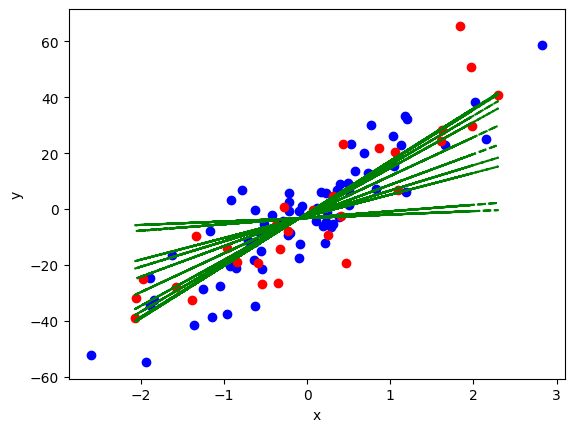

In [20]:
plotSingleRegressionV(xf, yf, xt, yt, ytp)

\
To determine which is the best $\lambda$ regularization parameter, we can compute the mean square error between the actual $\mathbf y$ targets and the predicted $\mathbf {\hat y}$ targets:

$$ mse = \frac {1}{m} \sum_{i=0}^{m-1} \left( y^{(i)} - \hat y^{(i)} \right) ^2 $$

In [21]:
def mse(y, yp):
    diff = np.subtract(y, yp)
    return np.mean(np.square(diff))    #or: np.divide(np.dot(diff, diff), len(y))

#or: sklearn mse function
#from sklearn.metrics import mean_squared_error

\
Let's search for $\lambda = [0, 1000]$ with a resolution of 1:

In [22]:
#Helper function to search lambda for minimum mse
def searchLambda(algo, rg, xf, yf, xt, yt):
    e = [ ]
    for l in rg:
        lrr = algo(l)
        lrr.fit(xf, yf)   
        ytp = lrr.predict(xt)
        e.append(mse(yt, ytp))

    mmse = np.min(e)
    minLambda = np.argmin(e) * np.max(rg)/len(rg)
    
    plt.plot(rg, e)
    plt.plot([0, minLambda], [mmse, mmse], '--', color='darkorange')
    plt.plot([minLambda, minLambda], [mmse-(max(e)-min(e))*0.1, mmse], '--', color='darkorange')
    plt.xlabel('λ')
    plt.ylabel('mse')

    return e, mmse, minLambda

\
We can pass as an argument to a function also a function. \
Thus, we can create several functions, each to choose one algorithm, like `normEqReg` function, and pass it to `searchLambda` function, to select the algorithm to use:

min mse =  137.18989643721622
min λ   =  0.0


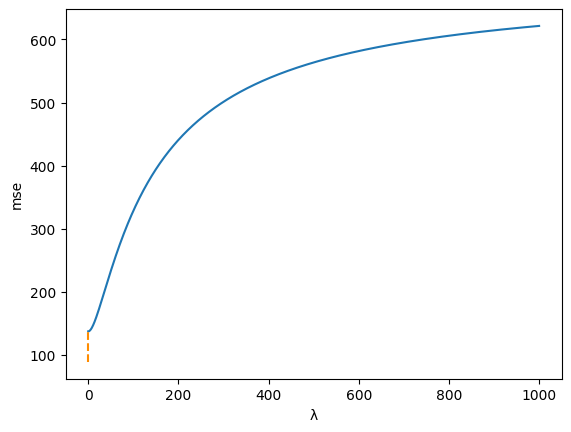

In [23]:
def normEqReg(l):
    return NormalEQReg(l)

lbs0 = np.linspace(0,1000,1001)
msev0, mmse0, mLambda0 = searchLambda(normEqReg, lbs0, xf, yf, xt, yt)
print('min mse = ', mmse0)
print('min λ   = ', mLambda0)

\
It seems there is an inflection near $\lambda = 0$. \
Let's search for $\lambda = [0, 1]$ with a resolution of 0.01:

min mse =  137.1882235707617
min λ   =  0.1188118811881188


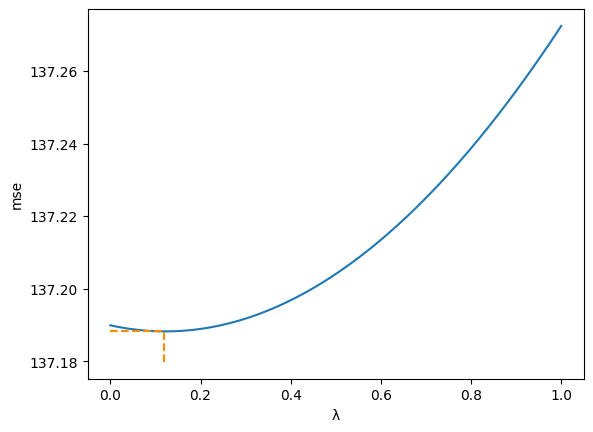

In [24]:
def normEqReg(l):
    return NormalEQReg(l)

lbs1 = np.linspace(0,1,101)
msev1, mmse1, mLambda1 = searchLambda(normEqReg, lbs1, xf, yf, xt, yt)
print('min mse = ', mmse1)
print('min λ   = ', mLambda1)

\
We can find the λ that minimizes mse with:

In [25]:
min_mse     = np.min(msev1)
min_mse_idx = np.argmin(msev1)
min_lambda  = lbs1[min_mse_idx]

print('mse(λ={:0.2f}) = {:0.5f}'.format(min_lambda, min_mse))

mse(λ=0.12) = 137.18822


---
### 10. Multivariate regression

`LinearRegressionSingle` class **cannot**  be used for multivariate regression: when there are more than one independent variable.
But NormalEQ` and `NormalEQReg` can.

Let's try `NormalEq` class with another dataset, now with 2 features, and a label column.

In [26]:
# Generate 2 independent variables problem
Xm, ym = generateData(2, 100)
print(Xm.shape)
#print(np.column_stack((Xm[:,0], Xm[:,1], ym)))

(100, 2)


In [27]:
#Solve with sklearn
lrkm = LinearRegressionSKL()
lrkm.fit(Xm, ym)
print(lrkm.intercept_, lrkm.coef_)

0.3592124267797807 [ 6.12919918 96.44309686]


In [28]:
#Solve with NormalEQ
neq = NormalEQ()
neq.fit(Xm, ym)
print(neq.theta())

[ 0.35921243  6.12919918 96.44309686]


In [29]:
#Solve with alias to NormalEQ
lrm = LinearRegression()
lrm.fit(Xm, ym)
print(lrm.theta())

[ 0.35921243  6.12919918 96.44309686]


In [30]:
#Try to solve with LinearRegressionSingle
lrs = LinearRegressionSingle() 
#lrs.fit(Xm, ym)                    #Uncomment to check that it generates an exception
print(lrs.theta())

None


In [31]:
#An helper function to plot the 2 independent variable regression data
#Plots the plane with large points
def plotRegressionPlane(Xm, ym, clf):
    fig = plt.figure()
    
    #plot dataset 
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Xm[:, 0], Xm[:, 1], ym, marker='o')
    
    #generate coordinates for all combinations of X0 and X1
    #2 matrices with shape len(X0) x len(X1)
    #each for one coordinate
    #x0_coord, x1_coord = np.meshgrid(Xm[:,0], Xm[:,1])
    
    #or:
    #generate coordinates for a plane that includes all X0, X1 points
    a0 = np.linspace(min(Xm[:,0]), max(Xm[:,0]), 100) #less points, eg. 75, more transparent
    a1 = np.linspace(min(Xm[:,1]), max(Xm[:,1]), 100) #less points, eg. 75, more transparent
    x0_coord, x1_coord = np.meshgrid(a0, a1)
    
    #Form a matrix with X0 in column 0 and X1 coordinate in column 1
    A = np.column_stack((x0_coord.flatten(), x1_coord.flatten()))
    
    #solve for the plane coordinates
    H = clf.predict(A)
    
    # Plot the regression plane
    ax.scatter(A[:,0], A[:,1], H, marker='o', alpha=0.01, color='lightgreen')
    ax.view_init(elev=30, azim=10)
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("y")

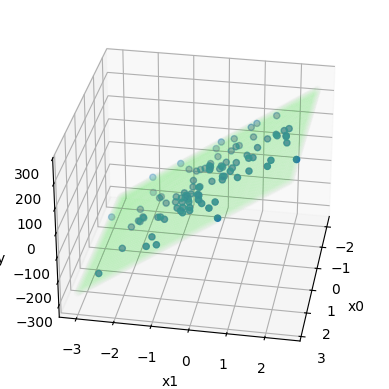

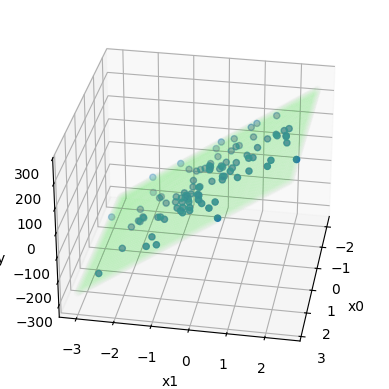

In [32]:
plotRegressionPlane(Xm, ym, lrkm)
plotRegressionPlane(Xm, ym, neq)